### Remark:
This notebook comprises of my Exploratory Data Analysis done on the quiz dataset as well the answers to the quiz were all imcluded in this notebook.

### Read to data

In [1]:
import pandas as pd
data = pd.read_csv('./Data_for_UCI_named.csv')
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


#### Data Exploration

In [2]:
print(data.shape)
print()
data.isna().sum()

(10000, 14)



tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [3]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


###### observation:
- Our data shows no misssing values and is of the shape(10000,14) 10000-rows and 14-columns.

- The reaction time(tau) has an average value of 5.25, with minimum value 0.5 and Max as 10.000

- The nominal power produced(P) has an average value of -1.25, with Min at -0.4 and Max at 2.0.It is observed that P1 is the aggregate sum of P2,P3,P4. Indicating P1= -(P2+P3+P4)

- The coefficient price(g) has an average value of 0.525, with Min at 0.05 and Max at 1.0. It also observed that g1 is equivalent to g2,g3 & g4.Indicating g1=g2=g3=4

- The stab column is nothing but a numerical attribute of the stabf column,indicating -ve as stable and +ve as unstable

### Data Visualization
Thus far,one can see that our data is numeric in nature so it would be imperative to see how these data are distributed for more insight

In [4]:
#import neccessary libraries for visualization
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as pyplot
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


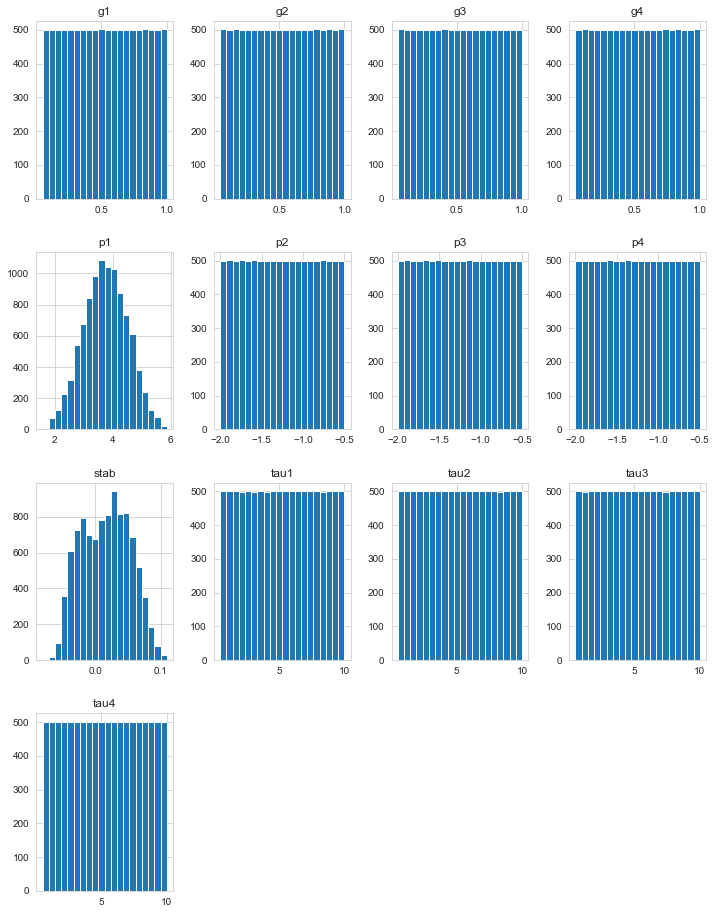

In [5]:
data.hist(bins=20,figsize=(12,16))
plt.show()

###### observations:
From the above plot we can see the distribution summary of our data, the dataset distribution looks okay except for the target variable(stab) which seem to have irregular distribution of data.The stab variable despite the distribution still does not give us a concrete info about the categorical dependent variable(stabf).Therefore we investigate to see our these categorical labels are distributed.

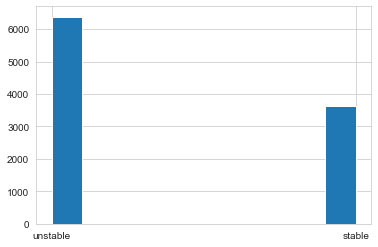

In [6]:
ax=data.stabf.hist()

As we can see our dependent variable does not look balanced, but first let us also investigate how other features interact with the dependent features

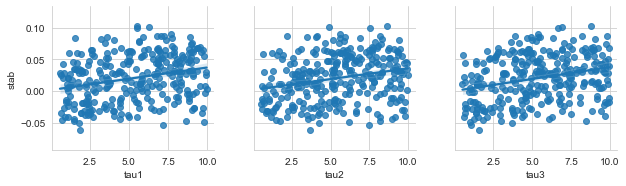

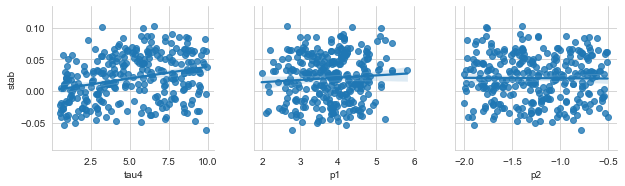

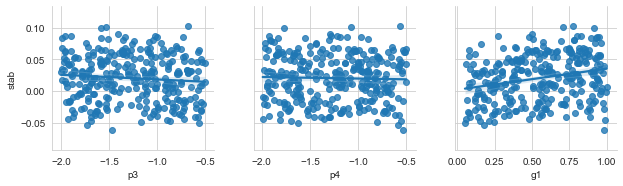

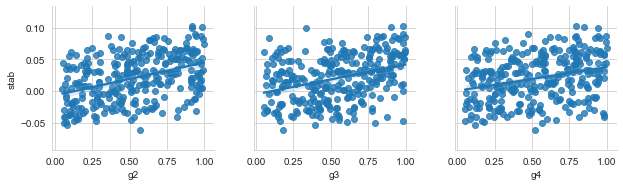

In [7]:
plot_columns = ['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4','stab']
plot_data = data[plot_columns].sample(300, random_state=1)

vis1 = sns.PairGrid(plot_data, y_vars=['stab'], x_vars=plot_columns[0:3],height=3,layout_pad=2)
vis2 = sns.PairGrid(plot_data, y_vars=['stab'], x_vars=plot_columns[3:6],height=3,layout_pad=2)
vis3 = sns.PairGrid(plot_data, y_vars=['stab'], x_vars=plot_columns[6:9],height=3,layout_pad=2)
vis4 = sns.PairGrid(plot_data, y_vars=['stab'], x_vars=plot_columns[9:12],height=3,layout_pad=2)

vis1.map(sns.regplot)
vis2.map(sns.regplot)
vis3.map(sns.regplot)
vis4.map(sns.regplot)

plt.show()

###### observations:
We can see from the above graph that our features have a linear relationship with our target variable

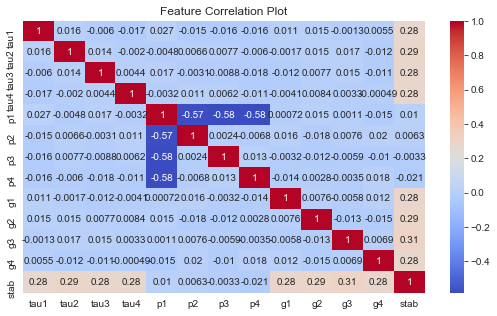

In [8]:
# Checking for the correlation plot
plt.figure(figsize=(9,5))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

plt.title('Feature Correlation Plot')
plt.show()

In [9]:
## Investigating more on our unbalanced target avriable

data['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

If we must use the stabf column extensively to build a model,then we will have to convert the categorical label into a numerical value that is acceptable by the machine for processing. So we will have to apply the LabelEncoder transform by assigning (0 = stable, and 1 = unstable)

In [10]:
from sklearn.preprocessing import LabelEncoder
data['stabf'] = LabelEncoder().fit_transform(data.stabf)

In [11]:
data.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0


In [12]:
#Inspecting more in our imbalanced data
count_unstable = len(data[data['stabf']== 1])
count_stable = len(data[data['stabf']== 0])
perc_of_unstable = count_unstable/(count_unstable+count_stable)
print('percentage of unstable is',perc_of_unstable*100)
perc_of_stable = count_stable/(count_unstable+count_stable)
print('percentage of stable is',perc_of_stable*100)

percentage of unstable is 63.800000000000004
percentage of stable is 36.199999999999996


As we can still see our data looks imbalanced with the percentage distribution of unstable and stable in the ratio of 64:36 respectively. Now we will have to apply smote method

### Data Preprocessing

In [13]:
# first we drop the stab column since we no longer need it for building our model
data.drop(columns={'stab'},axis=1,inplace =True)

In [14]:
X = data.drop(columns='stabf')
y = data['stabf']

In [15]:
y.head(2)

0    1
1    0
Name: stabf, dtype: int32

In [16]:
#splitting our dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
y_train.value_counts()

1    5092
0    2908
Name: stabf, dtype: int64

Now we will have to apply smote method to our unbalanced dataset by oversampling the minority class

In [18]:
import imblearn
from pandas import DataFrame
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state =1)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

x_train_balanced,y_train_balanced = smote.fit_sample(x_train,y_train)
x_train_balanced = DataFrame(data=x_train_balanced,columns=x_train.columns)
y_train_balanced = DataFrame(data=y_train_balanced,columns=['stabf'])
# let us verify if our data has been sampled to the right shape.
print('Length of oversampled data:',len(x_train_balanced))
print('===============================')
print('Total number of stable in oversampled data:',len(y_train_balanced[y_train_balanced['stabf']==0]))
print('================================')
print('Total number of unstable in oversample data:',len(y_train_balanced[y_train_balanced['stabf']==1]))


Length of oversampled data: 10184
Total number of stable in oversampled data: 5092
Total number of unstable in oversample data: 5092


As we can see both categories are now balanced.The reason we only had to oversample the train data,as it appears to be the domain knowledge required excessively by the machine to provide a good classification,therefore the test set should be exempted so as not to add any additional irrelevant information to our test data

In [20]:
#Before we scale,we combine our train and test data to include our dependent variable
train_final = pd.concat([x_train_balanced,y_train_balanced], axis=1)
test_final = pd.concat([x_test,y_test], axis=1)

In [21]:
from sklearn.preprocessing import StandardScaler
#fit scaler on our train set
scaler = StandardScaler()
normalised_train_df = scaler.fit_transform(train_final)
normalised_train_df = DataFrame(normalised_train_df,columns=train_final.columns)
normalised_train_df['stabf'] = train_final['stabf']
# fit scaler on our test set
test_final = test_final.reset_index(drop=True)
normalised_test_df = scaler.fit_transform(test_final)
normalised_test_df = DataFrame(normalised_test_df,columns=test_final.columns)
normalised_test_df['stabf'] = test_final['stabf']

In [22]:
normalised_train_df.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,0.431352,-0.906078,0.709472,1.601487,-0.299634,0.070986,1.327370,-0.875325,0.227072,0.416592,0.675795,0.56777,1
1,0.007043,0.151748,1.089400,-1.545174,0.636265,-0.061013,-1.541948,0.492481,-0.241282,-1.540004,1.547891,-1.42798,1


In [23]:
normalised_test_df.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,0.592163,-0.420565,1.472472,1.093036,0.426786,-1.504594,-0.792677,1.600201,-0.925703,1.175287,-1.492644,1.086291,1
1,0.199183,0.364543,-0.190076,-0.518473,-0.229402,-1.071766,0.427103,1.052337,-1.655910,-0.395949,1.412703,1.227535,1


###### observations:
As we can see the dependent variable is included in our data, we will do final preprocessing by dropping them and assigning values accordingly for retraining our data on the newly generated variables.

In [24]:
X_train = normalised_train_df.drop(['stabf'],axis=1)
X_test = normalised_test_df.drop(['stabf'],axis=1)
y_train = normalised_train_df['stabf']
y_test = normalised_test_df['stabf']

### Implementing the model

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train,y_train)

LogisticRegression()

In [27]:
# calculating the test result and accuracy
predicted_y = log_reg.predict(X_test)
print('Accuracy of logistics regression: {:.2f}'.format(log_reg.score(X_test, y_test)))

Accuracy of logistics regression: 0.80


##### Confusion Matrix

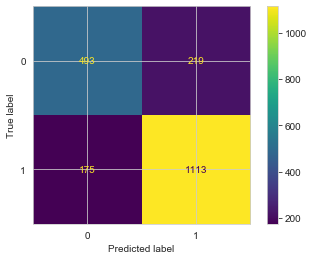

In [28]:
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = plot_confusion_matrix(log_reg,X_test,y_test)

###### observation: 
The above confussion matrix shows that we have 493 + 1113 correct predictions and 175 + 219 incorrect predictions which seem to be a good prediction

In [29]:
# calculating the precision, recall,F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_y))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       712
           1       0.84      0.86      0.85      1288

    accuracy                           0.80      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.80      0.80      0.80      2000



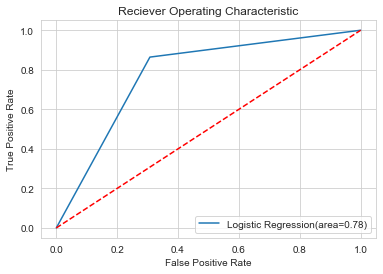

In [30]:
# calculating the Roc curve for logistic regression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

log_roc_curve = roc_auc_score(y_test,log_reg.predict(X_test))
fpr,tpr,thresholds = roc_curve(y_test,log_reg.predict(X_test))
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression(area=%0.2f)' % log_roc_curve)
plt.plot([0, 1],[0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Implementing Machine learning pipelines.
Even though the logistic regression gave such a good result in classfying our dataset,still we do not need to be complacent.The ideal thing for us to do is to develop other machine learning algorithms to train our data and then we can evaluate the results and compare across individual developed models, as per which shows the best performance,until then we cannot comfortably choose a model without prior comparisons.

*The following Algorithms would be used for evaluation*

- RandomForest
- ExtraTreesClassifier
- XGB Boosting
- Lightgbm

In [31]:
#importing neccessary libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [32]:
# storing our model in a list
models =  [
    
    ['RandomForestRegressor:', RandomForestRegressor()],
           ['ExtraTreesClassifier:', ExtraTreesClassifier()],
    ['lightgbm:',lgb.LGBMClassifier()],
            ['Xgboost:', xgb.XGBRegressor()]
]

In [33]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

model_data = []
for name,curr_model in models:
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data['Name'] = name
    curr_model.fit(X_train,y_train)
   
     # Measuring the model performance
    curr_model_data['Train_R2_Score_Performance']= metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data['Test_R2_Score_Performance']= metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data['Test_RMSE_Score_Performance']=np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    
    # Measuring the train and test set score for signal of overfitting
    curr_model_data['Training Set Score'] = curr_model.score(X_train,y_train)
    curr_model_data['Test Set Score'] = curr_model.score(X_test,y_test)
    model_data.append(curr_model_data)


[04:49:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#### Question. NO 16,15,14

In [34]:
model_data

[{'Name': 'RandomForestRegressor:',
  'Train_R2_Score_Performance': 0.9589746194100085,
  'Test_R2_Score_Performance': 0.7170851071254101,
  'Test_RMSE_Score_Performance': 0.25468058426193385,
  'Training Set Score': 0.9589746194100085,
  'Test Set Score': 0.7170851071254101},
 {'Name': 'ExtraTreesClassifier:',
  'Train_R2_Score_Performance': 1.0,
  'Test_R2_Score_Performance': 0.679408891060088,
  'Test_RMSE_Score_Performance': 0.27110883423451915,
  'Training Set Score': 1.0,
  'Test Set Score': 0.9265},
 {'Name': 'lightgbm:',
  'Train_R2_Score_Performance': 0.996218141897477,
  'Test_R2_Score_Performance': 0.7273885128061972,
  'Test_RMSE_Score_Performance': 0.25,
  'Training Set Score': 0.999125,
  'Test Set Score': 0.9375},
 {'Name': 'Xgboost:',
  'Train_R2_Score_Performance': 0.6787095537367157,
  'Test_R2_Score_Performance': 0.6177881988355836,
  'Test_RMSE_Score_Performance': 0.29601926691038,
  'Training Set Score': 0.6787095537367157,
  'Test Set Score': 0.6177881988355836}]

In [35]:
# Converting the above result into a dataframe for better visualization
df = DataFrame(model_data)

In [36]:
df

,Name,Train_R2_Score_Performance,Test_R2_Score_Performance,Test_RMSE_Score_Performance,Training Set Score,Test Set Score
0,RandomForestRegressor:,0.958975,0.717085,0.254681,0.958975,0.717085
1,ExtraTreesClassifier:,1.000000,0.679409,0.271109,1.000000,0.926500
2,lightgbm:,0.996218,0.727389,0.250000,0.999125,0.937500
3,Xgboost:,0.678710,0.617788,0.296019,0.678710,0.617788


###### observations:
- The best model for this dataset is the lightgbm model which has training accuracy of 0.99 and an R2 test score 0.727, which indicate no signal of overfitting compairing the value of range. It also has the least RMSE value, with a narrow range between the train set score and test set score.
- The second performing best model is given by the Random Forest with an R2 score of 0.95 and 0.71 of train and test set respectively.
- The ExtraTree regressor has a training score of 100% which could be as a result of model overfitting.
- The least performing model is given by the Xgboost with R2 test score of 0.617

##### Parameter Tunning:
Since the ExtraTree regressor shows training accuracy of 100%, we then test the model using the parameter tunning to improve its performance as a trial.

In [37]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators = [50,100,300,500,1000]
min_samples_split = [2,3,5,7,9]
min_samples_leaf = [1,2,4,6,8]
max_features = ['auto','sqrt','log2',None]

hyperparameters_grid = {'n_estimators': n_estimators,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf': min_samples_leaf,
                      'max_features': max_features}

reg = ExtraTreesClassifier(random_state=1)
grid_search = GridSearchCV(reg, hyperparameters_grid)
grid_search.fit(X_train,y_train)

In [38]:
# Searching for the best tuned parameter set
grid_search.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [46]:
# best possible parameters for ExtraTrees classifier
grid_search.best_estimator_

ExtraTreesClassifier(min_samples_split=5, n_estimators=1000, random_state=1)

In [40]:
# Train_R2_Score_Performance for the tunned model
grid_search.best_estimator_.score(X_train,y_train)

1.0

In [41]:
# Test_R2_score_performance for the tunned model
grid_search.best_estimator_.score(X_test,y_test)

0.9355

In [42]:
# RMSE Score performance on tunned
np.sqrt(mean_squared_error(y_test,grid_search.best_estimator_.predict(X_test)))

0.2539685019840059

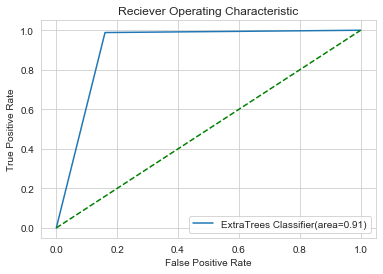

In [43]:
# plotting the Roc curve for ExtraTreesClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

log_roc_curve = roc_auc_score(y_test,grid_search.best_estimator_.predict(X_test))
fpr,tpr,thresholds = roc_curve(y_test,grid_search.best_estimator_.predict(X_test))
plt.figure()
plt.plot(fpr,tpr,label='ExtraTrees Classifier(area=%0.2f)' % log_roc_curve)
plt.plot([0, 1],[0, 1],'g--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

###### observations:
As we can see the ExtraTreesClassifier model has improved tremendously upon parameter tunning and still goes by beating our presumed best model which goes by the [LIGHTGBM]. Now we can say there was an improvement of 0.25% on the test accuracy. We can also see that is has almost the value of RMSE with the lightgbm with a narrow difference of 0.003. Also compairing the area under the ROC curve with that of our LogisticRegression we see that ExtraTreesClassifier has a higher accuracy in classifying our data.

#### Question no 20

#### Feature Importance

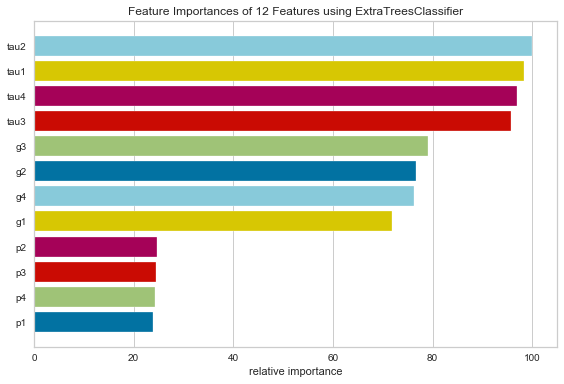

In [58]:
# obtain feature importances for the optimal ExtraTreesClassifier features
from yellowbrick.model_selection import FeatureImportances

model = ExtraTreesClassifier(min_samples_split=5, n_estimators=1000, random_state=1)
viz = FeatureImportances(model)
viz.fit(X_train,y_train)
viz.show()

###### observations:
From the above graph our most important feature is given by tau2 and least important feature is p1

#### Question No-1

In [42]:
[TP,TN,FP,FN]=[355,120,45,1480]

Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

F1 = 2*Precision*Recall/(Precision+Recall)

In [43]:
print(F1)

0.3176733780760626
